In [1]:
import sklearn
sklearn.__version__

'1.3.0'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss
import os

In [3]:
os.chdir("C:/Training/Academy/Statistics (Python)/Cases/Wisconsin")

In [4]:
cancer = pd.read_csv("BreastCancer.csv", index_col=0)
cancer.head()

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,Benign
63375,9,1,2,6,4,10,7,7,2,Malignant
76389,10,4,7,2,2,8,6,1,1,Malignant
95719,6,10,10,10,8,10,7,10,7,Malignant
128059,1,1,1,1,2,5,5,1,1,Benign


In [5]:
lbl = LabelEncoder()
cancer['Class'] = lbl.fit_transform(cancer['Class'])
X = cancer.drop('Class', axis=1)
y = cancer['Class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=23,
                                                    stratify=y)

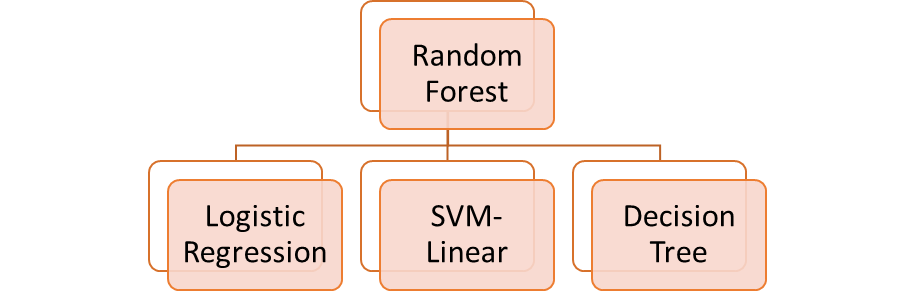

#### Instantiating

In [7]:
lr = LogisticRegression()
svm = SVC(probability=True, random_state=23, kernel='linear')
dtc = DecisionTreeClassifier(random_state=23)
rf = RandomForestClassifier(random_state=23)

#### Forming a Stack

In [8]:
stack = StackingClassifier(estimators=[('LOGISTIC', lr),
                                       ('SVML', svm),
                                       ('TREE',dtc)],
                           passthrough=True,
                          final_estimator=rf)

#### Using the Stack

In [9]:
stack.fit(X_train, y_train)

StackingClassifier(estimators=[('LOGISTIC', LogisticRegression()),
                               ('SVML',
                                SVC(kernel='linear', probability=True,
                                    random_state=23)),
                               ('TREE',
                                DecisionTreeClassifier(random_state=23))],
                   final_estimator=RandomForestClassifier(random_state=23),
                   passthrough=True)

#### Prediction

In [10]:
y_pred = stack.predict(X_test)

#### Predicted Probability

In [11]:
y_pred_prob = stack.predict_proba(X_test)

#### Evaluation

In [12]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Log Loss=", log_loss(y_test, y_pred_prob[:,1]))

Accuracy Score: 0.9571428571428572
Log Loss= 0.33482728496411585
